In [1]:
cd /mnt/Data/Scripts/Sleep-Oct14/src/

/mnt/Data/Scripts/Sleep-Oct14/src


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.misc import comb
import scipy as scp
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import sets
import random
import itertools
import os,sys,fnmatch
import timeit
import scipy.stats

/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: the sets module is deprecated


In [3]:
import Recordings
import signale, trajectory, custom_plot

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
def subsequence(sub,ref):
    '''
    A function to determine the number of specefic sequence repeated within a larger sequence.
    
    Parameters:
    sub:
    ref:
    
    
    Returns:
    idx : This an array containing the index of elements of sub in the ref! if idx is stricktly increasing the sequence sub
    is replayed whithin sequence ref!
    '''
    ref = np.array(ref)
    idx = np.array([])
    for ii in range(len(sub)):
        index = np.where(ref == sub[ii])[0]
        if index.size:
            idx = np.append(idx,index)
        else: 
            return [] , False
    idx = np.int0(idx)
    return idx, True

def median(arr):
    '''
    mY median... ;)
    '''
    arr = np.array(arr)
    if np.mod(arr.size,2) == 0 :
        return arr[arr.size / 2 - 1]
    else: 
        return arr[arr.size / 2 ]
    
def sequencer(arr,method = 'median'):
    '''
    This function sequences the given array(with possible repeated elements) into an array of distinct elements! Considering either 
    first or the midian position of repeated elements.
    '''
    arr = np.array(arr)
    idx_seq = np.array([])
    if method == 'median':
        for item in set(arr):
            idx_seq = np.append(idx_seq,median(np.where(arr == item)[0]))
        idx_seq.sort()
    if method == 'first':
        for item in set(arr):
            idx_seq = np.append(idx_seq,np.where(arr == item)[0][0])
        idx_seq.sort()

    return arr[np.int0(idx_seq)]

def duplicate_indicator(arr_group,weights=np.array([])):
    '''
    Finds and counts the duplicates! This Function makes a frequency distribution the number of
    arrays within a goup of arrays.
    
    Parameters:
    -----------
    arr_group: The one that you want to count
    weights: an array containig the wights(results of a previous counting of etc.). 
    If non empty the distribution will be weighted 
             with respect to this array!
    Returns:
    -----------
    arr_set: Set of distinct arrays in arr_group
    arr_weights: repitition counts of elements in arr_set.
    '''
    
    arr_cp = np.copy(arr_group)   
    for ii in range(len(arr_group)):
        for jj in range(len(arr_group)):
            if np.array_equal(arr_cp[jj], arr_cp[ii]) and ii != jj:
                arr_cp[jj] = np.array([-1])
    arr_set = []
    for item in arr_cp:
        if item.sum() > 0:
            arr_set.append(item)
    arr_set = np.array(arr_set)
    ### Counting number of repititions
    arr_weights = np.zeros(len(arr_set))
    for ii in range(len(arr_set)):
        for jj in range(len(arr_group)):
            if np.array_equal(arr_group[jj],arr_set[ii]):
                if weights.size:
                    arr_weights[ii] += weights[jj]
                else:
                    arr_weights[ii] += 1
    return arr_set,arr_weights

def next_permutation(arr):
    '''
    
        Computes the next lexicographical permutation of the specified list in place,
     returning whether a next permutation existed. (Returns False when the argument
     is already the last possible permutation.)
    
    
         Example:
            arr = [0, 1, 0]
            next_permutation(arr)  (returns True)
            arr has been modified to be [1, 0, 0]
    Reference:
    -----------
    Nayuki Minase, 2014. Public domain.
    http://nayuki.eigenstate.org/page/next-lexicographical-permutation-algorithm
            '''
    
    i = len(arr) - 1
    while i > 0 and arr[i - 1] >= arr[i]:
        i -= 1
    if i <= 0:
        return False
    
    # Find successor to pivot
    j = len(arr) - 1
    while arr[j] <= arr[i - 1]:
        j -= 1
    arr[i - 1], arr[j] = arr[j], arr[i - 1]
    
    # Reverse suffix
    arr[i : ] = arr[len(arr) - 1 : i - 1 : -1]
    return True

def number_of_permutations(arr):
    Cnk = [] #keep the combinations!
    s = 0    # sum of repitiotions of elements in arr!
    arrcp = np.array(arr).copy()
    arrcp.sort()
    for item in set(arrcp):
        reps = np.where(arrcp == item)[0].size
        Cnk.append(comb(arrcp.size - s,reps,True))
        s += reps
    return np.prod(np.array(Cnk))
def all_permutations(arr):
    '''
    produces all possible permutations of a given array using lexographical ordering.
    Sequence the arrays and returns the weights of all possible sequences!
    This version is fast but memory consuming, better for the short arrays!
    written by A. Chenani Sep. 2014
    '''
    sqStack = []
    weightsStack = []
    for item in arr:
        item.sort()
        arr_seqz = [sequencer(item)]
        #####Cunstructing sequence set
        start =  timeit.default_timer()
        
        arr_seqz_set = np.array([])
        sample_seq = arr_seqz[0].copy()
        sample_seq.sort()
        arr_seqz_set = np.append(arr_seqz_set,sample_seq)
        while next_permutation(sample_seq):
            arr_seqz_set = np.append(arr_seqz_set,sample_seq)
        arr_seqz_set = arr_seqz_set.reshape(np.math.factorial(sample_seq.size),arr_seqz[0].size)
        
        stop = timeit.default_timer()
        print 'part one --> %f' %(stop - start)
        
        
        #####creating MUA permutation list!
        start =  timeit.default_timer()
        
        while next_permutation(item):
            arr_seqz.append(sequencer(item))
        arr_seqz = np.array(arr_seqz) #This contains all sequences coming from permutations of an specific MUA!
       
        stop = timeit.default_timer()
        print 'part two --> %f' %(stop - start)
        
        #####Calculating the wights of all possible sequences
        start =  timeit.default_timer()
        weights = []
        for item in arr_seqz_set:
            selection = arr_seqz[np.where(arr_seqz[:,0]==item[0])[0]]
            for ii in range(1,arr_seqz_set.shape[1]):
                selection = selection[np.where(selection[:,ii]==item[ii])[0]]
            weights.append(selection.size/float(arr_seqz.size))
        weightsStack.append(np.array(weights))
        sqStack.append(arr_seqz_set)
        
        stop = timeit.default_timer()
        print 'part three --> %f' %(stop - start)
    return sqStack,weightsStack
def All_permutations(arr):
    '''
    produces all possible permutations of a given array using lexographical ordering.
    Sequence the arrays and returns the weights of all possible sequences!
    This version is not using that much memory but its slow, better for long arrays.
    written by A. Chenani Sep. 2014
    '''
    sqStack = []
    weightsStack = []
    for item in arr:
        item.sort()
        #####Cunstructing sequence set
        arr_seqz_set = np.array([])
        sample_seq = sequencer(item)
        sample_seq.sort()
        arr_seqz_set = np.append(arr_seqz_set,sample_seq)
        while next_permutation(sample_seq):
            arr_seqz_set = np.append(arr_seqz_set,sample_seq)
        arr_seqz_set = arr_seqz_set.reshape(np.math.factorial(sample_seq.size),sample_seq.size)
        
        
        
        
        #####creating MUA permutation list!
        start =  timeit.default_timer()
        lexRank = [0]
        while next_permutation(item):
            selection = np.arange(arr_seqz_set.size)
            for ii in range(arr_seqz_set[0].size -1 ):
                selection = np.intersect1d(selection,np.where(arr_seqz_set[:,ii]==sequencer(item)[ii])[0])
            lexRank.append(selection[0])
        lexRank = np.array(lexRank)
        stop = timeit.default_timer()
        print 'part two --> %f' %(stop - start)
        #####Calculating the wights of all possible sequences
        weights = []
        for ii,item in enumerate(arr_seqz_set):
            weights.append(np.where(lexRank == ii)[0].size /float(lexRank.size))
        weightsStack.append(np.array(weights))
        sqStack.append(arr_seqz_set)
    return sqStack,weightsStack

def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]

In [5]:
placeCellList = '/home/chenani/dataWork/ali/MECLesion_SleepData/Marta/Rat3661/LinearTrack_03-05-15Day3/parrentData/placeCells.spk'
placeCellLesion = '/mnt/Data/ephysdata/Rats/MECLesion/Rat434Lesion/linearTrack_stList.spk'
sqz = '/mnt/Data/IpythonNotebooks/Sleep/MEC_Lesion_Project/Rat3661Control/dataFiles/rat3661D3postMedian.seqz'
mua = '/mnt/Data/IpythonNotebooks/Sleep/MEC_Lesion_Project/Rat3661Control/dataFiles/rat3661D3post.mua'

In [12]:
subsequence([5,3,7],range(10))

(array([5, 3, 7]), True)

In [6]:
spikes = pkl.load(open(placeCellLesion,'rb'))

IOError: [Errno 2] No such file or directory: '/mnt/Data/ephysdata/Rats/MECLesion/Rat434Lesion/linearTrack_stList.spk'

In [24]:
spikesControl = pkl.load(open(placeCellList,'rb'))

In [73]:
spikes.convolveSpikes(kernel_width=15,binwidth=1)

MemoryError: 

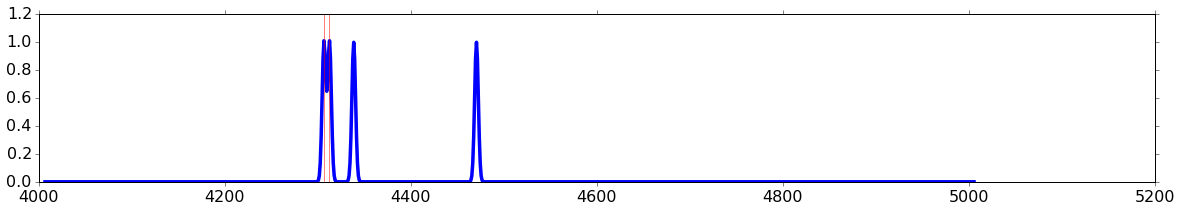

In [17]:
f,ax = pl.subplots(1,1,figsize = [20,3])
pl.plot(spikes.timeAxis[4000:5000],spikes.convolvedSpikeTrains[9][4000:5000])
pl.axvline(spikes[9].spike_times[12],color = 'r',linewidth = 0.5)
pl.axvline(spikes[9].spike_times[13],color = 'r',linewidth = 0.5)

In [18]:
zug = spikes[9]
zug.spike_times[:10]
idx = np.where(np.diff(zug.spike_times)<10)[0]
print idx
zug.spike_times[idx]
for cell in spikes.convolvedSpikeTrains:
    print cell.max()

[    3     4    12 ..., 10211 10223 10233]
1.89360589912
2.01783218582
2.21524881054
1.53515198704
1.53296449592
1.4890275623
2.21306131943
1.8846843937
1.88249690258
2.50013655884
2.82478902619
1.88249690258
1.76499380517
1.93118312707
1.89360589912
1.8846843937
1.4890275623
2.20714936994
2.20714936994
2.20714936994
1.92643383621
2.50013655884
1.50013655884
1.88249690258


In [8]:
spikes.sumConvolvedSpikeTrains(kernelWidth=50)

Calculated time axis with 1 ms resolution


array([ 1.41227137,  1.50696977,  1.59865649, ...,  2.94556411,
        2.67509158,  2.40055237])

13923621

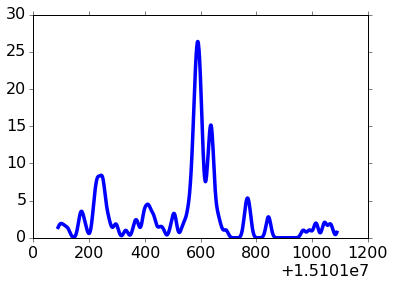

In [9]:
idxmx = spikes.summedConvolvedSpikeTrains.argmax()
pl.plot(spikes.timeAxis[idxmx-500:idxmx+500],spikes.summedConvolvedSpikeTrains[idxmx-500:idxmx+500])
#spikes.timeAxis.size,spikes.summedConvolvedSpikeTrains.size,[spikes.convolvedSpikeTrains[ii].size for ii in spikes.id_list]
spikes.summedConvolvedSpikeTrains.argmax()

In [10]:
thresh = spikes.summedConvolvedSpikeTrains.mean() + 3 * spikes.summedConvolvedSpikeTrains.std()
print thresh
1.0*np.where(spikes.summedConvolvedSpikeTrains>thresh)[0].size/spikes.summedConvolvedSpikeTrains.size

9.92446476365


0.015242092825709649

In [11]:
spikes.burstDetector(minTime=5)

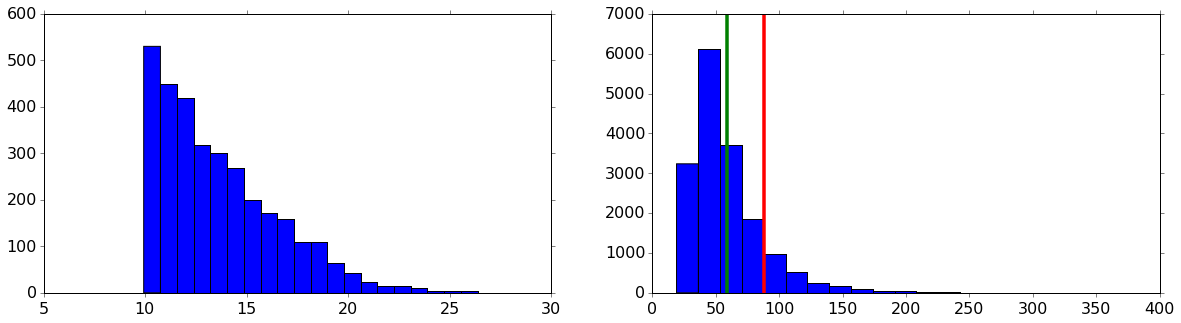

In [12]:
alpha = 0.6
BP = np.array([])
BT = np.array([])
for burst in spikes.bursts:
    BT = np.append(BT,burst[1]-burst[0])
for burst in spikes.bursts:
    if burst[1] - burst[0] > BT.mean()+alpha * BT.std():
        BP = np.append(BP,burst[2])
f,ax = pl.subplots(1,2,figsize=[20,5])
ax[0].hist(BP,20);
ax[1].hist(BT,20);
ax[1].axvline(BT.mean(),color='g')
ax[1].axvline(BT.mean() + BT.std(),color='r')

In [25]:
spikesControl.sumConvolvedSpikeTrains(kernelWidth=50)

Calculated time axis with 1 ms resolution


array([ 1.42064922,  1.49211875,  1.55124652, ...,  0.9523448 ,
        0.98257547,  0.99804878])

In [26]:
spikesControl.burstDetector(minTime=10)

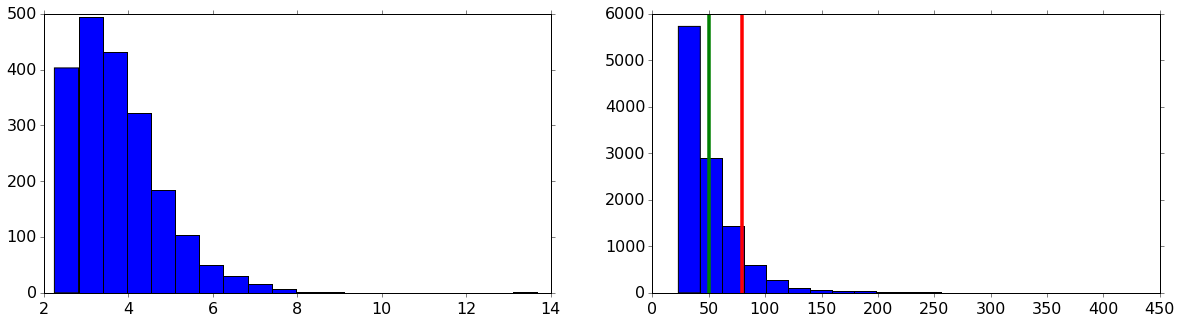

In [27]:
alpha = 0.6
BPC = np.array([])
BTC = np.array([])
for burst in spikesControl.bursts:
    BTC = np.append(BTC,burst[1]-burst[0])
for burst in spikesControl.bursts:
    if burst[1] - burst[0] > BTC.mean()+alpha * BTC.std():
        BPC = np.append(BPC,burst[2])
f,ax = pl.subplots(1,2,figsize=[20,5])
ax[0].hist(BPC,20);
ax[1].hist(BTC,20);
ax[1].axvline(BTC.mean(),color='g')
ax[1].axvline(BTC.mean() + BTC.std(),color='r')

In [71]:
intersection = np.logical_and(BTC<28,BTC > 25)
BTCm = BTC[np.logical_not(intersection)]
BTC[intersection].size/1.0/BTC.size

0.11442076161598146

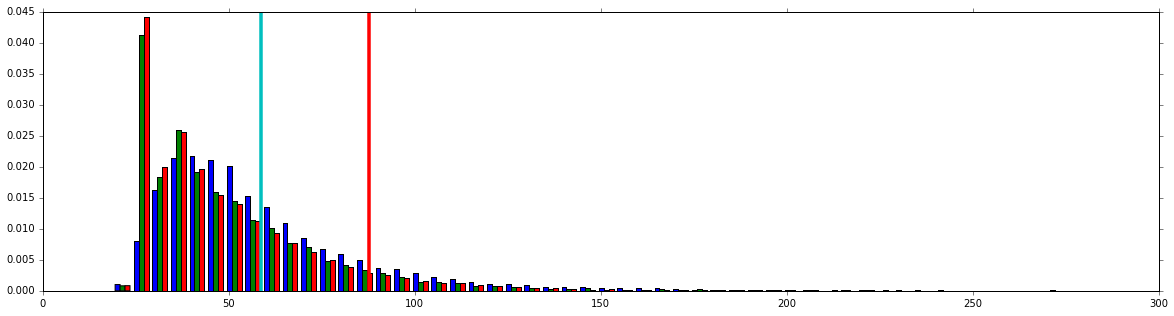

In [140]:
f,ax = pl.subplots(1,1,figsize=[20,5])
bins = np.arange(BT.min(),300,5)
ax.hist([BT,BTC,BTm],bins,log=False,normed=True);
ax.axvline(BT.mean(),color='c')
ax.axvline(BT.mean() + BT.std(),color='r')

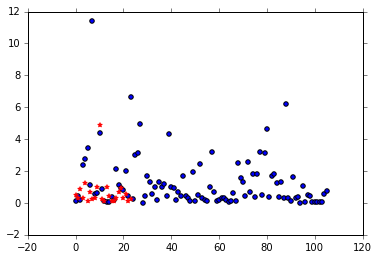

In [89]:
pl.scatter(range(106),spikes.mean_rates())
pl.scatter(range(24),spikesControl.mean_rates(),marker='*',color = 'r')

In [155]:
timeSpans = np.array([])
for kk in range(4):
    ID = -1
    stList = signale.spikezugList(t_start=None, t_stop=None, dims=[2])
    idList = np.arange(kk*26,(kk+1)*26)
    for ii in idList:
        ID+=1
        stList.__setitem__(ID, spikes.__getitem__(ii))
    stList.sumConvolvedSpikeTrains(kernelWidth=50)
    stList.burstDetector()
    for burst in stList.bursts:
        timeSpans = np.append(timeSpans,burst[1]-burst[0])
    timeSpans = np.append(timeSpans,-1)

Calculated time axis with 1 ms resolution
Calculated time axis with 1 ms resolution
Calculated time axis with 1 ms resolution
Calculated time axis with 1 ms resolution


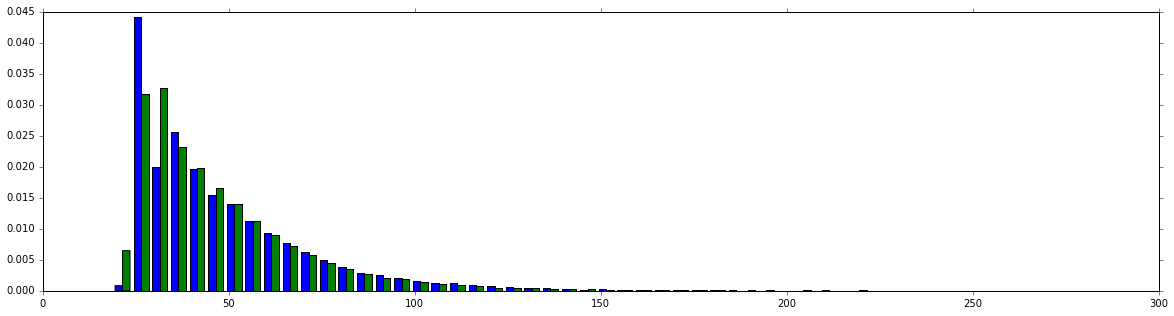

In [156]:
f,ax = pl.subplots(1,1,figsize=[20,5])
pl.hist([BTm,timeSpans],bins,normed=True);

In [158]:
np.arange(0,np.math.factorial(8)+1,np.math.factorial(7))

array([    0,  5040, 10080, 15120, 20160, 25200, 30240, 35280, 40320])

In [136]:
stList.burstDetector(minTime=10)

In [137]:
BTm = np.array([])


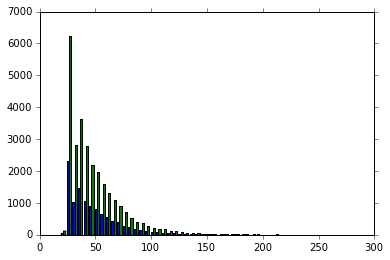

In [142]:
pl.hist([BTC,BTm],bins);

In [99]:
spikes.summedSpikeTrain.max()

0

In [141]:
spikesControl.id_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [7]:
sqz = pkl.load(open(sqz,'rb'))
seqz = [sqz[ii][:,0] for ii,sq in enumerate(sqz)]
mua = pkl.load(open(mua,'rb'))
#muaz = [mua[ii][:,0] for ii,mu in enumerate(mua)]
leftFields = np.array([4,8,6,22])

In [74]:
PLrankCorrLPre = []
for ii,item in enumerate(seqz):
    if subsequence(item,leftFields)[1] and subsequence(item,leftFields)[0].size > 0:
        print item
        corrPL =  scipy.stats.pearsonr(subsequence(item,leftFields)[0],sorted(subsequence(item,leftFields)[0]))
        PLrankCorrLPre.append(corrPL)

NameError: name 'seqz' is not defined

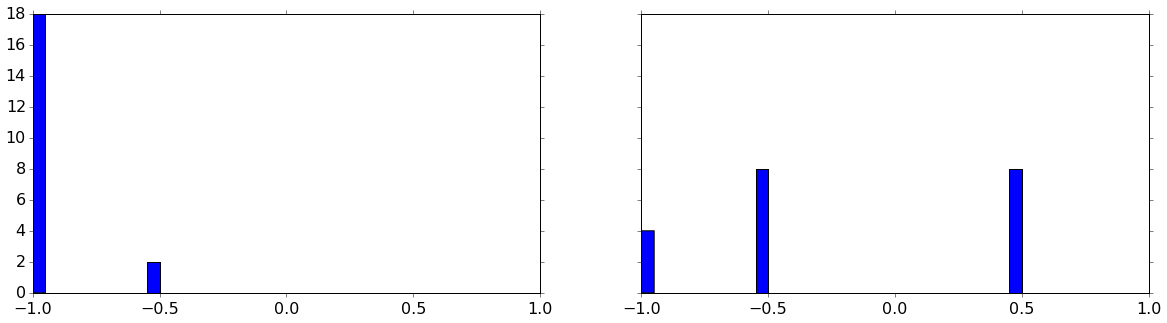

In [10]:
f,(ax1,ax2) = pl.subplots(1,2,figsize=[20,5],sharex=True,sharey=True)
bins = np.arange(-1.0,1,0.05)
ax1.hist(np.array(PLrankCorrLPre)[:,0],bins,normed=True);
ax2.hist(permsCorr,bins,normed=True);

In [11]:
sqzSize = []
cellHist = np.zeros(25)
for item in seqz:
    for cellTag in item:
        cellHist[cellTag] +=1

In [9]:
perms = all_permutations([range(3)])[0][0]
permsCorr = [scipy.stats.pearsonr(perm,perms[0])[0] for perm in perms ]

part one --> 0.000148
part two --> 0.000417
part three --> 0.000214
